# Analysis Sandbox - NYT

1. Sentiment Analysis
2. Topic Modeling
3. Word Count Studies and Metadata

Model Chomsky Table 2-1.

*Aniket Pant, PHIL 3127*

In [376]:
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_theme(style="whitegrid")
%matplotlib inline

# Load Data

In [377]:
skripal_df = pd.read_csv("./skripal_export.csv")
iranian_df = pd.read_csv("./scientist_assassination.csv")

In [378]:
skripal_df.head()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
0,Infectious diseases;Enrollments;Social distanc...,Unemployment benefits,United States--US; United Kingdom--UK; Minnesota,"Elizabeth II, Queen of Great Britain",https://www.nytimes.com/2020/10/15/nyregion/15...,Coronavirus Update: [Foreign Desk],"Barron, James","New York Times, Late Edition (East Coast); New...",A.4,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poisoning;Conventions;Biological & chemical we...,NaN,Russia; Germany; United Kingdom--UK,"Navalny, Alexei",https://www.nytimes.com/2020/10/06/world/europ...,"Putin's Leading Rival Was Poisoned, Affirm Wor...","Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",A.15,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Public health;Poisoning;Documentary films;Mili...,NaN,Russia; United Kingdom--UK,"Skripal, Sergei V; Sturgess, Dawn",https://www.nytimes.com/2020/10/01/arts/televi...,Picking Up the Pieces After the Poisonings: [T...,"Schwirtz, Michael","New York Times, Late Edition (East Coast); New...",C.3,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Social networks;Poisoning;Coma;Biological & ch...,NaN,Russia; France; Germany,"Navalny, Alexei",https://www.nytimes.com/2020/09/23/world/europ...,Putin Critic Leaves Hospital After Poisoning: ...,"Eddy, Melissa","New York Times, Late Edition (East Coast); New...",A.10,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Poisoning;Biological & chemical weapons;Murder...,Sanctions;International relations,Russia,"Navalny, Alexei; Putin, Vladimir",https://www.nytimes.com/2020/09/22/opinion/vla...,What Can Mr. Putin Get Away With?: [Editorial],NaN,"New York Times, Late Edition (East Coast); New...",A.26,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
iranian_df.head()

,Subject,Location,People,Title,Author,Publication title,Pages,Publication year,Publication date,column,...,Document type,ProQuest document ID,Document URL,Copyright,Last updated,Database,fullText,Company / organization,Dateline,Dataset
0,Diplomacy;Foreign policy;International relatio...,Israel; Iran; United States--US,"Bush, George W; Kerry, John F; Obama, Barack","Diplomacy and Sanctions, Yes. Left Unspoken on...","Sanger, David E","New York Times, Late Edition (East Coast); New...",A.8,2016.0,20-Jan-16,News Analysis,...,Commentary,1.758057e+09,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 20, 2016",11/22/2017,3 databasesView listGlobal NewsstreamProQuest ...,WASHINGTON -- President Obama and Secretary of...,NaN,NaN,Scientist Assassination
1,Espionage;Assassinations & assassination attem...,Israel; Iran,"Melman, Yossi; Raviv, Dan",Tehran Abuzz As Book Says Israel Killed 5 Scie...,"Afkhami, Artin","New York Times, Late Edition (East Coast); New...",A.8,2012.0,12-Jul-12,NaN,...,News,1.024462e+09,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jul 12, 2012",11/19/2017,3 databasesView listGlobal NewsstreamProQuest ...,The latest literary sensation in Tehran is a t...,CBS Broadcasting Inc,NaN,Scientist Assassination
2,Nuclear weapons;Sanctions;International relati...,United States--US; Israel; Iran,"Dempsey, Martin E",U.S. General Visits Israel For Discussions on ...,"Bronner, Ethan","New York Times, Late Edition (East Coast); New...",A.6,2012.0,20-Jan-12,NaN,...,News,9.168194e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 20, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,"JERUSALEM -- Gen. Martin E. Dempsey, chairman ...",Joint Chiefs of Staff,NaN,Scientist Assassination
3,Military exercises;Missile defense;Internation...,United States--US; Israel; Iran,NaN,"Military Drill With the U.S. Is Postponed, Isr...","Kershner, Isabel","New York Times, Late Edition (East Coast); New...",A.9,2012.0,17-Jan-12,NaN,...,NEWSPAPER,9.162812e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 17, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,NaN,NaN,NaN,Scientist Assassination
4,Assassinations & assassination attempts;Scient...,United States--US; Iran,NaN,Iran Signals Revenge Over Killing Of Scientist...,"Gladstone, Rick","New York Times, Late Edition (East Coast); New...",A.10,2012.0,13-Jan-12,NaN,...,News,9.156441e+08,https://go.openathens.net/redirector/gatech.ed...,"Copyright New York Times Company Jan 13, 2012",11/18/2017,3 databasesView listGlobal NewsstreamProQuest ...,Error encountered in scraping fullText.,NaN,NaN,Scientist Assassination


In [380]:
df = pd.concat([skripal_df, iranian_df])

In [381]:
df.tail()

,Subject,Business indexing term,Location,People,URL,Title,Author,Publication title,Pages,Publication year,...,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274
14,NaN,NaN,Iran,NaN,NaN,Iran: Arrests in Attacks on Nuclear Scientists...,"Worth, Robert F","New York Times, Late Edition (East Coast); New...",A.8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Meetings;International relations,NaN,Iran,"Ahmadinejad, Mahmoud; Jalili, Saeed",NaN,WORLD BRIEFING MIDDLE EAST; Iran: Date Set for...,WILLIAM YONG and J. DAVID GOODMAN,"New York Times, Late Edition (East Coast); New...",A.8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Nuclear weapons;Sanctions;Assassinations & ass...,NaN,United States--US; Israel; Iran,"Ahmadinejad, Mahmoud",NaN,Bombings Hit Atomic Experts In Iran Streets: [...,WILLIAM YONG and ROBERT F. WORTH,"New York Times, Late Edition (East Coast); New...",A.1,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Demonstrations & protests;Capital punishment;P...,NaN,United States--US; Teheran Iran; Iran,NaN,NaN,Motorcycle Bomb Kills Iranian Physics Professo...,"Cowell, Alan","New York Times, Late Edition (East Coast); New...",A.12,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Covert operations;Nuclear weapons;Military air...,NaN,Iran; United States--US; Israel,"Bush, George W",NaN,U.S. Rejected Aid For Israeli Raid On Nuclear ...,"Sanger, David E","New York Times, Late Edition (East Coast); New...",A.1,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
df.columns[0:34]

Index(['Subject', 'Business indexing term', 'Location', 'People', 'URL',
       'Title', 'Author', 'Publication title', 'Pages', 'Publication year',
       'Publication date', 'Section', 'Publisher', 'Place of publication',
       'Country of publication', 'Publication subject', 'ISSN', 'Source type',
       'Language of publication', 'Document type', 'ProQuest document ID',
       'Document URL', 'Copyright', 'Last updated', 'Database', 'fullText',
       'Company / organization', 'column', 'Identifier / keyword', 'Dateline',
       'CODEN', 'Company', 'Number of pages', 'Dataset'],
      dtype='object')

<AxesSubplot:>

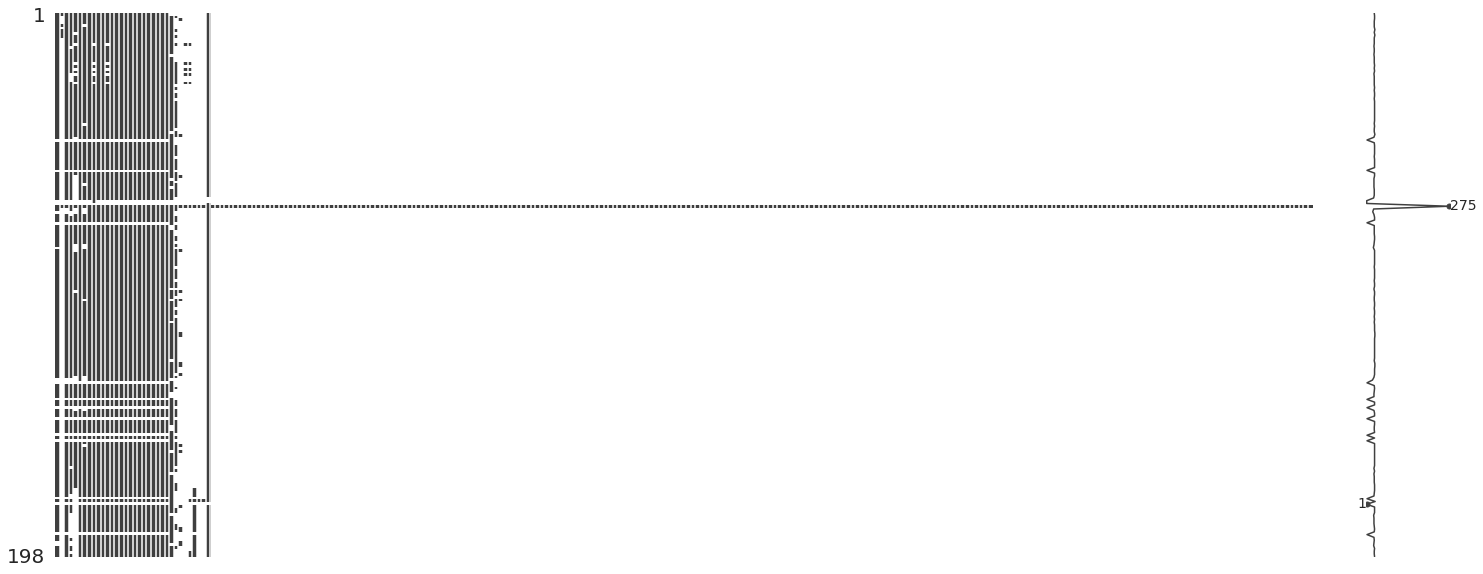

In [383]:
df = df.dropna(axis=1, how='all')
msno.matrix(df)

In [384]:
df = df[['fullText', 'Dataset', 'Author', "People"]]
df = df.dropna()

In [385]:
df = df[df.fullText != "Error encountered in scraping fullText."]

In [386]:
df.head()

,fullText,Dataset,Author,People
1,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei"
2,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn"
3,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei"
5,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei"
6,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei"


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullText  115 non-null    object
 1   Dataset   115 non-null    object
 2   Author    115 non-null    object
 3   People    115 non-null    object
dtypes: object(4)
memory usage: 4.5+ KB


# WordCloud

In [388]:
from wordcloud import WordCloud, STOPWORDS

In [389]:
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("mr")

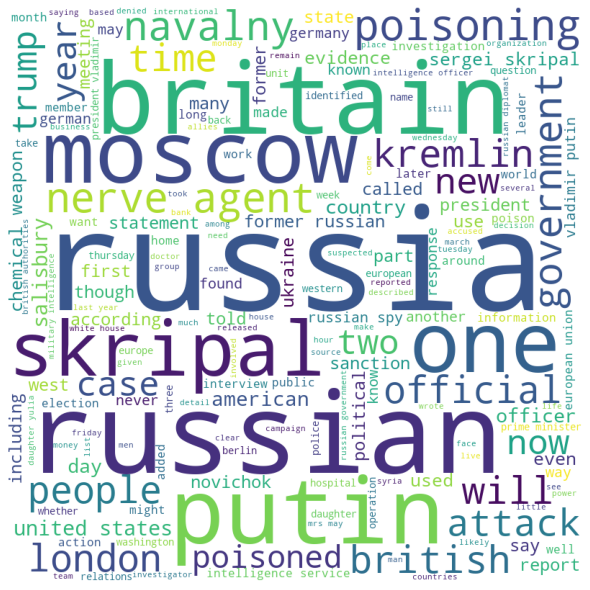

In [390]:
# iterate through the csv file 
for val in df[df['Dataset'] == "Skripal"]['fullText']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

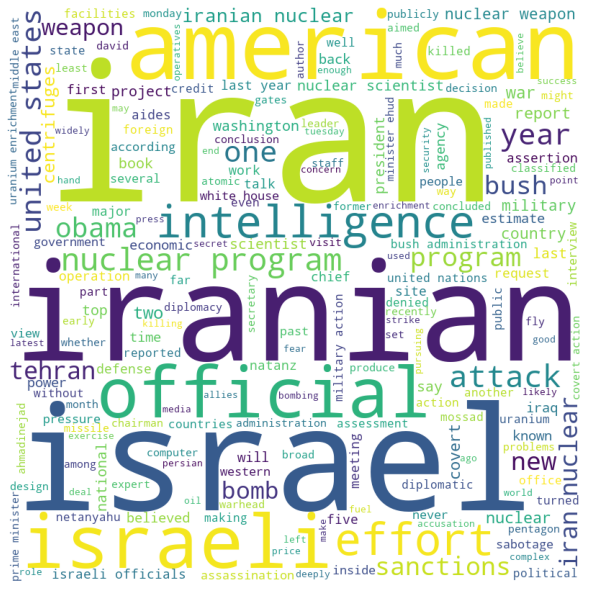

In [391]:
# iterate through the csv file 
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("mr")
for val in df[df['Dataset'] == "Scientist Assassination"]['fullText']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

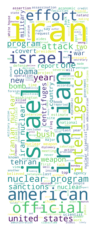

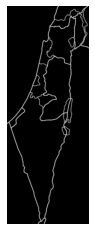

In [392]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
israel_mask = np.array(Image.open("./Israel_districts_blank.png"))

wc = WordCloud(width = 800, height = 800, 
                mask=israel_mask,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("israelWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(israel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

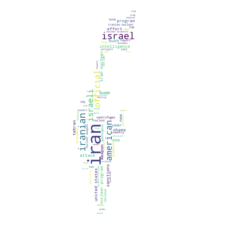

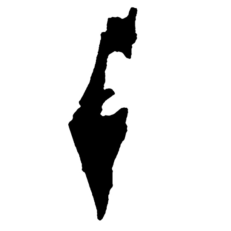

In [393]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
israel_mask = np.array(Image.open("./is_stencil_jpjpg.jpg"))

wc = WordCloud(width = 1000, height = 1000,
                mask=israel_mask,
                background_color ='white', 
                max_words=100,
                stopwords = stopwords,
                min_font_size = 5)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("israelWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(israel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

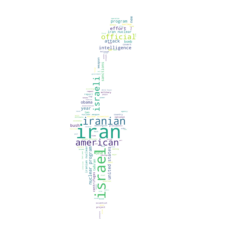

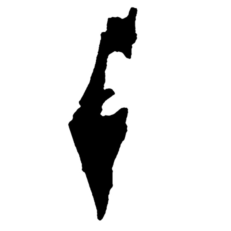

In [394]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
israel_mask = np.array(Image.open("./IsraelBig.jpg"))

wc = WordCloud(width = 1000, height = 1000,
                mask=israel_mask,
                background_color ='white', 
                max_words=100,
                stopwords = stopwords,
                min_font_size = 5)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("israelWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(israel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

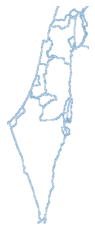

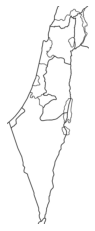

In [395]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
israel_mask = np.array(Image.open("./Israel_districts_blank.jpg"))

wc = WordCloud(width = 1000, height = 1000,
                mask=israel_mask,
                background_color ='white', 
                max_words=100,
                stopwords = stopwords,
                contour_width=3, contour_color='steelblue',
                min_font_size = 5)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("israelWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(israel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

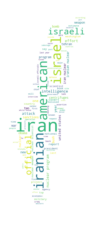

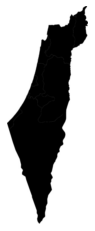

In [396]:
from os import path
from PIL import Image
import numpy as np
import os

# load image
israel_mask = np.array(Image.open("./Israel_SVG.jpg"))

wc = WordCloud(width = 1000, height = 1000,
                mask=israel_mask,
                background_color ='white', 
                max_words=100,
                stopwords = stopwords,
                min_font_size = 5)
  
# generate word cloud
wc.generate(comment_words)

# store to file
wc.to_file("israelWC.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(israel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Count

In [397]:
p = r'\w+'
df['wordCount'] = df['fullText'].apply(lambda x: len(re.findall(p, x)))

In [398]:
df.head()

,fullText,Dataset,Author,People,wordCount
1,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",1189
2,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",1230
3,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",851
5,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",740
6,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",921


In [399]:
df.isnull

<bound method DataFrame.isnull of                                              fullText  \
1   The Organization for the Prohibition of Chemic...   
2   A new AMC show dramatizes the 2018 poisoning o...   
3   Doctors treating Aleksei Navalny said he had b...   
5   The opposition leader jokes that he has recove...   
6   Aides of the Russian opposition leader collect...   
..                                                ...   
2   JERUSALEM -- Gen. Martin E. Dempsey, chairman ...   
12  JERUSALEM -- Israel's departing intelligence c...   
15  TEHRAN -- Iran and the European Union agreed T...   
16  TEHRAN -- Unidentified assailants riding motor...   
18  President Bush deflected a secret request by I...   

                    Dataset                             Author  \
1                   Skripal                  Schwirtz, Michael   
2                   Skripal                  Schwirtz, Michael   
3                   Skripal                      Eddy, Melissa   
5                

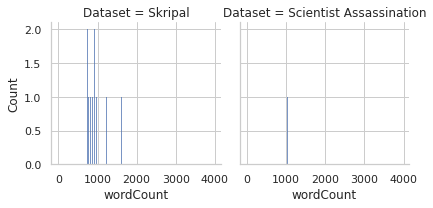

In [400]:
sns.displot(
    df, x="wordCount", col="Dataset",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:xlabel='Dataset', ylabel='wordCount'>

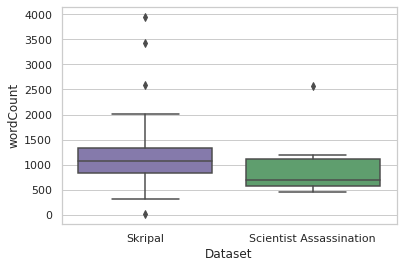

In [401]:
sns.boxplot(x="Dataset", y="wordCount", palette=["m", "g"],
            data=df)

Text(0, 0.5, 'Word Count')

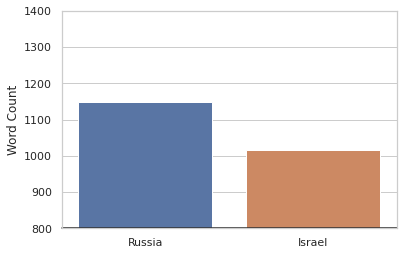

In [402]:
sns.barplot(x=['Russia', 'Israel'], y=[df[df['Dataset'] == "Skripal"]['wordCount'].mean(), df[df['Dataset'] == "Scientist Assassination"]['wordCount'].mean()], palette="deep")
plt.axhline(800, color="k", clip_on=False)
plt.ylim(800,1400)
plt.ylabel("Word Count")

In [403]:
df['Dataset'].value_counts()

Skripal                    108
Scientist Assassination      7
Name: Dataset, dtype: int64

# Sentiment Analysis

Hypothesis: Sentiment will be the same for Russian and Israel portrayal groups.

In [404]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [405]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [406]:
df['negSentiment'] = df['fullText'].apply(lambda x: sentiment_analyzer_scores(x)['neg'])
df['posSentiment'] = df['fullText'].apply(lambda x: sentiment_analyzer_scores(x)['pos'])

In [407]:
df.head()

,fullText,Dataset,Author,People,wordCount,negSentiment,posSentiment
1,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",1189,0.174,0.062
2,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",1230,0.136,0.051
3,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",851,0.099,0.042
5,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",740,0.081,0.047
6,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",921,0.105,0.054


In [408]:
# normalize
min_max_scaler = preprocessing.MinMaxScaler()
df['negSentimentScaled'] = df['negSentiment'].apply(lambda x: x/df['negSentiment'].max())
df['posSentimentScaled'] = df['posSentiment'].apply(lambda x: x/df['posSentiment'].max())

<ipython-input-409-78e982b1c77b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Positive and Negative Sentiment - NYT", fontSize = 16)


Text(21.296589988425936, 0.5, 'Negative Sentiment')

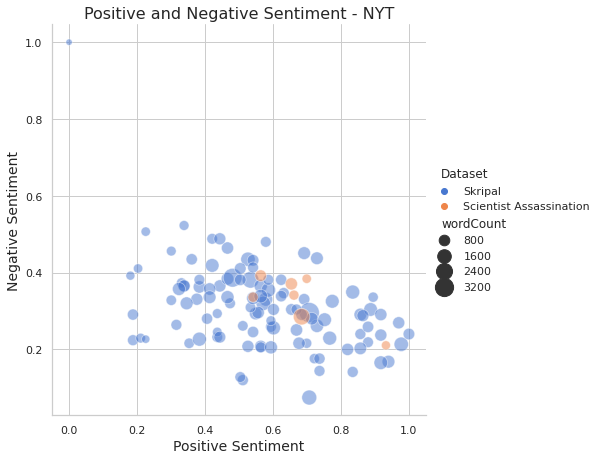

In [409]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="posSentimentScaled", y="negSentimentScaled", hue="Dataset", size="wordCount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.title("Positive and Negative Sentiment - NYT", fontSize = 16)
plt.xlabel("Positive Sentiment", fontsize = 14)
plt.ylabel("Negative Sentiment", fontsize = 14)

# Word2Vec + UMAP

In [410]:
from gensim.models import Word2Vec    #Import gensim Word2Fec
import umap
import re

In [411]:
#Emoticon strings
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

#Define the regex strongs.
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
#Assign strings to output
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenise(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenise(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

#Get the tokenized value for each word
tokenised = []
for tw in df['fullText']:
    tokens = preprocess(tw)
    tokenised.append(tokens)

#Grab the first 5
print(tokenised[0:2])

[['The', 'Organization', 'for', 'the', 'Prohibition', 'of', 'Chemical', 'Weapons', 'bolstered', 'the', 'assessments', 'of', 'European', 'countries', 'that', 'a', 'form', 'Novichok', 'sickened', 'Aleksei', 'A', '.', 'Navalny', ',', 'the', 'Russian', 'opposition', 'leader', '.', 'The', 'Organization', 'for', 'the', 'Prohibition', 'of', 'Chemical', 'Weapons', 'confirmed', 'on', 'Tuesday', 'that', 'the', 'substance', 'used', 'to', 'poison', 'the', 'Russian', 'opposition', 'leader', 'Aleksei', 'A', '.', 'Navalny', 'had', '"', 'similar', 'structural', 'characteristics', '"', 'to', 'the', 'Novichok', 'family', 'of', 'highly', 'potent', 'nerve', 'agents', '.', 'The', 'finding', 'from', 'the', "world's", 'leading', 'chemical', 'weapons', 'body', 'adds', 'additional', 'weight', 'to', 'the', 'conclusions', 'of', 'laboratories', 'in', 'Germany', ',', 'France', 'and', 'Sweden', ',', 'and', 'increases', 'the', 'likelihood', 'that', 'Russia', ',', 'which', 'has', 'been', 'accused', 'of', 'using', 'a'

In [412]:
model = Word2Vec(tokenised, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=12392, size=100, alpha=0.025)


In [413]:
# summarise vocabulary
words = list(model.wv.vocab)
print(words[0:5])

['The', 'Organization', 'for', 'the', 'Prohibition']


In [414]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(model[model.wv.vocab])
embedding.shape

<ipython-input-414-18371917ccac>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding = reducer.fit_transform(model[model.wv.vocab])


(12392, 2)

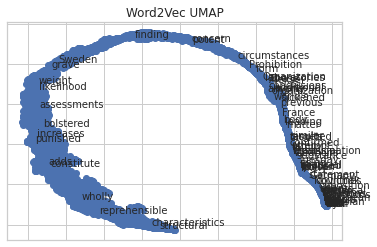

In [415]:
fig, ax = plt.subplots()
ax.plot(embedding[:, 0], embedding[:, 1], 'o')
ax.set_title('Word2Vec UMAP')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks

words = list(model.wv.vocab)
for i, word in enumerate(words[0:100]):
	plt.annotate(word, xy=(embedding[i, 0], embedding[i, 1]))
plt.show()

# Doc2Vec

In [416]:
df = df.reset_index(drop = True)
df['fullText'].shape

(115,)

In [417]:
df.head()

,fullText,Dataset,Author,People,wordCount,negSentiment,posSentiment,negSentimentScaled,posSentimentScaled
0,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",1189,0.174,0.062,0.464000,0.466165
1,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",1230,0.136,0.051,0.362667,0.383459
2,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",851,0.099,0.042,0.264000,0.315789
3,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",740,0.081,0.047,0.216000,0.353383
4,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",921,0.105,0.054,0.280000,0.406015


In [418]:
df.Dataset.value_counts()

Skripal                    108
Scientist Assassination      7
Name: Dataset, dtype: int64

In [419]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split


#Tag train set
tagged_tr = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[i]) for i, _d in enumerate(df.fullText)]

In [420]:
model = Doc2Vec(vector_size=100,
                window=5, 
                alpha=.025, 
                min_alpha=0.00025, 
                min_count=2, 
                dm=1, 
                workers=8)
model.build_vocab(tagged_tr)

In [422]:
epochs = range(100)
for epoch in epochs:
    model.train(tagged_tr,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.00025
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
     
model.save('math_lectures.model')

In [423]:
X_train = np.array([model.docvecs[i] for i in range(len(tagged_tr))])
y_train = df['Dataset']

In [424]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_train)
embedding.shape

(115, 2)

In [425]:
df['umap1'] = embedding[:, 0]
df['umap2'] = embedding[:, 1]

In [426]:
df.head()

,fullText,Dataset,Author,People,wordCount,negSentiment,posSentiment,negSentimentScaled,posSentimentScaled,umap1,umap2
0,The Organization for the Prohibition of Chemic...,Skripal,"Schwirtz, Michael","Navalny, Alexei",1189,0.174,0.062,0.464000,0.466165,9.996080,3.106789
1,A new AMC show dramatizes the 2018 poisoning o...,Skripal,"Schwirtz, Michael","Skripal, Sergei V; Sturgess, Dawn",1230,0.136,0.051,0.362667,0.383459,8.495316,5.314090
2,Doctors treating Aleksei Navalny said he had b...,Skripal,"Eddy, Melissa","Navalny, Alexei",851,0.099,0.042,0.264000,0.315789,10.105022,2.741715
3,The opposition leader jokes that he has recove...,Skripal,"Schwirtz, Michael","Navalny, Alexei",740,0.081,0.047,0.216000,0.353383,10.600810,3.000043
4,Aides of the Russian opposition leader collect...,Skripal,"Schwirtz, Michael","Navalny, Alexei",921,0.105,0.054,0.280000,0.406015,10.668781,3.054434


<ipython-input-427-63e0314bba6c>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("UMAP", fontSize = 16)


Text(21.296589988425936, 0.5, 'UMAP 2')

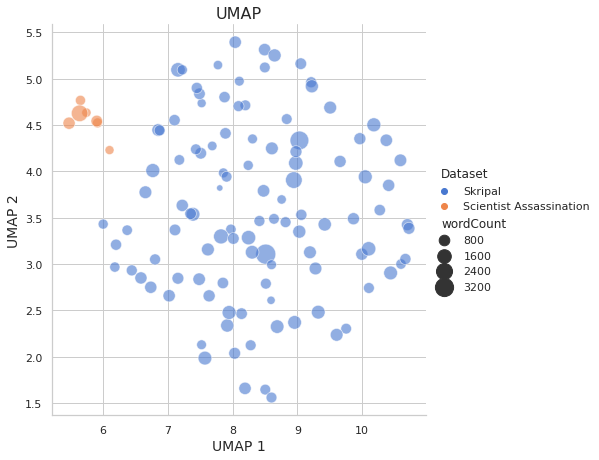

In [427]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="umap1", y="umap2", hue="Dataset", size="wordCount",
            sizes=(40, 400), alpha=.6, palette="muted",
            height=6, data=df)
plt.title("UMAP", fontSize = 16)
plt.xlabel("UMAP 1", fontsize = 14)
plt.ylabel("UMAP 2", fontsize = 14)

## Similarity Test

In [428]:
import gensim

In [429]:
model.init_sims()

In [430]:
doc_id

77

In [431]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_tr)):
    inferred_vector = model.infer_vector(tagged_tr[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [432]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({114: 96, 113: 8, 112: 6, 111: 2, 107: 1, 62: 1, 110: 1})


In [433]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_tr[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_tr[sims[index][0]].words)))

Document (114): «president bush deflected a secret request by israel last year for specialized bunker-busting bombs it wanted for an attack on iran 's main nuclear complex and told the israelis that he had authorized new covert action intended to sabotage iran 's suspected effort to develop nuclear weapons , according to senior american and foreign officials . white house officials never conclusively determined whether israel had decided to go ahead with the strike before the united states protested , or whether prime minister ehud olmert of israel was trying to goad the white house into more decisive action before mr. bush left office . but the bush administration was particularly alarmed by an israeli request to fly over iraq to reach iran 's major nuclear complex at natanz , where the country 's only known uranium enrichment plant is located . the white house denied that request outright , american officials said , and the israelis backed off their plans , at least temporarily . but

In [434]:
import random
doc_id = random.randint(0, len(tagged_tr) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_tr[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_tr[sim_id[0]].words)))

Train Document (60): «editors ' note appendedlondon -- arron banks , a british financier who bankrolled the campaign for britain to leave the european union , has long bragged about his `` boozy six-hour lunch '' with the russian ambassador eight months before the vote . some also wondered about mr. banks 's russian-born wife and their custom license plate , x mi5 spy , after the british intelligence agency , mi5 . but mr. banks always laughed off questions about his ties to the kremlin . now , a leaked record of some of mr. banks 's emails suggest that he and his closest adviser had a more engaged relationship with russian diplomats than he has disclosed . while mr. banks was spending more than eight million british pounds to promote a break with the european union -- an outcome the russians eagerly hoped for -- his contacts at the russian embassy in london were opening the door to at least three potentially lucrative investment opportunities in russian-owned gold or diamond mines . o

In [435]:
model.wv.most_similar("tehran")

[('when', 0.4350295066833496),
 ('on', 0.4262000322341919),
 ('impressive', 0.42521747946739197),
 ('them', 0.41183581948280334),
 ('interest', 0.4034803509712219),
 ('russia', 0.3993564248085022),
 ('london', 0.3952956795692444),
 ('samples', 0.39444059133529663),
 ('his', 0.3915262818336487),
 ('dominating', 0.3906939625740051)]

# Keyword Extraction

In [449]:
!pip install -U regex
import re

Requirement already up-to-date: regex in /home/jovyan/.local/lib/python3.8/site-packages (2020.11.11)


In [450]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 1)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([df['fullText'].iloc[0]])
candidates = count.get_feature_names()

In [454]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

ModuleNotFoundError: No module named 'regex'

In [457]:
!pip uninstall -y sentence-transformers

Found existing installation: sentence-transformers 0.3.8
Uninstalling sentence-transformers-0.3.8:
  Successfully uninstalled sentence-transformers-0.3.8


In [459]:
!conda install -y pytorch torchvision cudatoolkit=10.0 -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / ^C
failed

CondaError: KeyboardInterrupt

